In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

C:\Users\ratee\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
train_df = pd.read_csv("Train_dataset.csv")
test_df = pd.read_csv("Test_dataset.csv")

In [7]:
train_df.shape

(3493, 34)

In [8]:
test_df.shape

(500, 33)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [10]:
dups = train_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
train_df.describe()

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
count,3493.000000,3.493000e+03,3394.000000,3437.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3444.000000,...,3281.000000,2728.000000,1010.000000,786.000000,205.000000,3468.000000,3493.000000,3493.000000,3493.00000,3493.000000
mean,61747.000000,3.072571e+07,77.938715,74.404684,0.788720,0.988262,0.808188,0.801889,0.800172,1.926539,...,8.479427,4.012830,2.932673,3.655216,3.590244,6.423010,6.874893,4.546808,3.23132,6.275122
std,1008.486572,2.165125e+07,9.829169,10.940327,0.408275,0.107719,0.393783,0.398633,0.399928,0.260930,...,1.287233,1.009044,0.859519,0.973250,0.906351,2.050026,1.847131,1.877063,1.99305,1.895057
min,60001.000000,3.500000e+06,43.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,60874.000000,1.800000e+07,72.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,7.000000,3.000000,2.000000,3.000000,3.000000,5.000000,6.000000,3.000000,2.00000,5.000000
50%,61747.000000,3.000000e+07,79.000000,74.050000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,7.000000,7.000000,5.000000,3.00000,6.000000
75%,62620.000000,3.700000e+07,85.745000,82.400000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,5.000000,3.000000,4.000000,4.000000,8.000000,8.000000,6.000000,5.00000,8.000000
max,63493.000000,4.000000e+08,97.760000,98.700000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,8.000000,6.000000,7.000000,6.000000,10.000000,10.000000,10.000000,10.00000,10.000000


plt.subplots(figsize=(20,18))
ax = sns.heatmap(train_df.corr(),cmap='rainbow', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [13]:
# Drop columns with too many nulls
train_df = train_df.drop('Live Sports Rating', axis=1)
train_df = train_df.drop('Value Deals Rating', axis=1)
train_df = train_df.drop('Comedy Gigs Rating', axis=1)
test_df = test_df.drop('Live Sports Rating', axis=1)
test_df = test_df.drop('Value Deals Rating', axis=1)
test_df = test_df.drop('Comedy Gigs Rating', axis=1)

In [14]:
categoric_vars = ['Cuisine','City', 'Restaurant Location','Endorsed By','Restaurant Type','Restaurant Theme']
every_column_except_y= [col for col in train_df.columns if col not in ['Annual Turnover','Registration Number']]

In [15]:
every_column_non_categorical= [col for col in train_df.columns if col not in categoric_vars and col not in ['Registration Number'] ]
every_X_non_categorical= [col for col in train_df.columns if col not in categoric_vars and col not in ['Annual Turnover','Registration Number'] ]

C:\Users\ratee\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


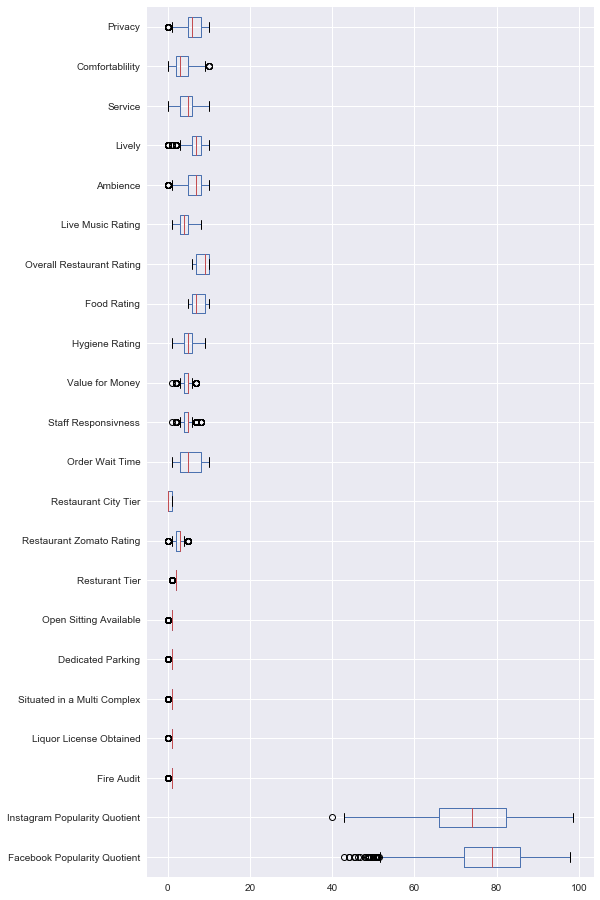

In [16]:
train_df[every_X_non_categorical].boxplot(figsize=(8,16), vert = 0)

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
# Change the date field to number of days
from datetime import date
train_df['Opening Day of Restaurant'] = pd.to_datetime(train_df['Opening Day of Restaurant'])
today = date(2020, 9, 1)
today = pd.to_datetime(today)
delta = today - train_df['Opening Day of Restaurant'] 
train_df['days_since'] = delta.dt.days
train_df = train_df.drop('Opening Day of Restaurant', axis=1)

In [19]:
test_df['Opening Day of Restaurant'] = pd.to_datetime(test_df['Opening Day of Restaurant'])
today = date(2020, 9, 1)
today = pd.to_datetime(today)
delta = today - test_df['Opening Day of Restaurant'] 
test_df['days_since'] = delta.dt.days
test_df = test_df.drop('Opening Day of Restaurant', axis=1)

In [20]:
categoric_vars = ['Cuisine','City', 'Restaurant Location','Endorsed By','Restaurant Type','Restaurant Theme']

In [21]:
every_column_except_y= [col for col in train_df.columns if col not in ['Annual Turnover','Registration Number']]

In [22]:
every_column_non_categorical= [col for col in train_df.columns if col not in categoric_vars and col not in ['Registration Number'] ]
every_X_non_categorical= [col for col in train_df.columns if col not in categoric_vars and col not in ['Annual Turnover','Registration Number'] ]

In [23]:
numeric_feats = train_df[every_column_non_categorical].dtypes[train_df.dtypes != "object"].index
test_numeric_feats = test_df[every_X_non_categorical].dtypes[train_df.dtypes != "object"].index
test_numeric_feats

Index(['Facebook Popularity Quotient', 'Instagram Popularity Quotient',
       'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy',
       'days_since'],
      dtype='object')

In [24]:
test_df = test_df.rename(columns={'Endoresed By': 'Endorsed By'})

In [25]:
#for column in train_df[test_numeric_feats].columns:
#    lr,ur=remove_outlier(train_df[column])
#    train_df[column]=np.where(train_df[column]>ur,ur,train_df[column])
#    train_df[column]=np.where(train_df[column]<lr,lr,train_df[column])

In [26]:
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        print(column.upper(),'in Train: ',train_df[column].nunique())
        print(train_df[column].value_counts().sort_values())
        print('-----------------------------------------------------')
        print(column.upper(),'in Test: ',test_df[column].nunique())
        print(test_df[column].value_counts().sort_values())
        print('\n')

CUISINE in Train:  20
nigerian,cajun          24
british,belgian         40
hawaiian,latvian        46
algerian,algerian       67
cuban,british           81
algerian,korean         83
irish,belgian           85
swedish,greek           92
peruvian,cuban         115
polish,jewish          117
turkish,sapnish        147
algerian,belgian       155
chinese,salvadorian    159
japanese,thai          204
turkish,nigerian       225
british,japanese       271
indian,irish           273
tibetan,italian        278
welsh,thai             345
tibetan,greek          686
Name: Cuisine, dtype: int64
-----------------------------------------------------
CUISINE in Test:  20
british,belgian          3
nigerian,cajun           4
algerian,algerian        5
hawaiian,latvian         9
polish,jewish           10
irish,belgian           10
swedish,greek           10
turkish,sapnish         13
cuban,british           15
japanese,thai           19
algerian,korean         19
peruvian,cuban          19
turkish,nig

In [27]:
#Combine the test and train 
train_df['train']=1
test_df['train']=0
test_df['Annual Turnover'] = 0
combined_data = pd.concat([train_df, test_df])

In [28]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3993 non-null   int64  
 2   Cuisine                        3993 non-null   object 
 3   City                           3993 non-null   object 
 4   Restaurant Location            3993 non-null   object 
 5   Facebook Popularity Quotient   3894 non-null   float64
 6   Endorsed By                    3993 non-null   object 
 7   Instagram Popularity Quotient  3937 non-null   float64
 8   Fire Audit                     3993 non-null   int64  
 9   Liquor License Obtained        3993 non-null   int64  
 10  Situated in a Multi Complex    3993 non-null   int64  
 11  Dedicated Parking              3993 non-null   int64  
 12  Open Sitting Available         3993 non-null   in

In [29]:
combined_data[numeric_feats].head()

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,days_since
0,42000000,84.3,95.8,1,1,1,0,1,2.0,3,...,5,7,10.0,4.0,8.0,8,6,6,6,4217
1,50000000,85.4,85.0,1,1,1,1,0,2.0,3,...,7,8,9.0,NaN,5.0,7,7,3,8,4355
2,32500000,85.0,68.2,1,1,1,1,0,2.0,3,...,3,7,8.0,3.0,7.0,10,5,2,8,3321
3,110000000,85.6,83.6,0,1,1,1,1,1.0,3,...,6,8,9.0,6.0,7.0,7,4,3,5,4293
4,20000000,NaN,76.8,1,1,1,1,1,NaN,3,...,4,8,6.0,NaN,NaN,6,2,4,6,3844


In [30]:
combined_data[categoric_vars] = combined_data[categoric_vars].fillna(combined_data[categoric_vars].mode().iloc[0])

In [31]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='mean')

In [32]:
SI.fit(combined_data[numeric_feats])
combined_data[numeric_feats] = SI.transform(combined_data[numeric_feats])

In [33]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3993 non-null   float64
 2   Cuisine                        3993 non-null   object 
 3   City                           3993 non-null   object 
 4   Restaurant Location            3993 non-null   object 
 5   Facebook Popularity Quotient   3993 non-null   float64
 6   Endorsed By                    3993 non-null   object 
 7   Instagram Popularity Quotient  3993 non-null   float64
 8   Fire Audit                     3993 non-null   float64
 9   Liquor License Obtained        3993 non-null   float64
 10  Situated in a Multi Complex    3993 non-null   float64
 11  Dedicated Parking              3993 non-null   float64
 12  Open Sitting Available         3993 non-null   fl

In [34]:
combined_data['City'] = pd.factorize(combined_data['City'])[0]
combined_data['City'].head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    0
8    7
9    8
Name: City, dtype: int64

In [35]:
combined_data = pd.get_dummies(combined_data, columns=['Cuisine','Restaurant Location','Endorsed By','Restaurant Type','Restaurant Theme'],drop_first=True)

In [36]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 85 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Registration Number                       3993 non-null   int64  
 1   Annual Turnover                           3993 non-null   float64
 2   City                                      3993 non-null   int64  
 3   Facebook Popularity Quotient              3993 non-null   float64
 4   Instagram Popularity Quotient             3993 non-null   float64
 5   Fire Audit                                3993 non-null   float64
 6   Liquor License Obtained                   3993 non-null   float64
 7   Situated in a Multi Complex               3993 non-null   float64
 8   Dedicated Parking                         3993 non-null   float64
 9   Open Sitting Available                    3993 non-null   float64
 10  Resturant Tier                       

In [37]:
train_df = combined_data[combined_data["train"]==1]
#train_df[numeric_feats] = np.log1p(train_df[numeric_feats])

In [38]:
test_df = combined_data[combined_data["train"]==0]

In [39]:
test_df = test_df.drop('Annual Turnover', axis=1)
#test_df[test_numeric_feats] = np.log1p(test_df[test_numeric_feats])

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 84 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Registration Number                       500 non-null    int64  
 1   City                                      500 non-null    int64  
 2   Facebook Popularity Quotient              500 non-null    float64
 3   Instagram Popularity Quotient             500 non-null    float64
 4   Fire Audit                                500 non-null    float64
 5   Liquor License Obtained                   500 non-null    float64
 6   Situated in a Multi Complex               500 non-null    float64
 7   Dedicated Parking                         500 non-null    float64
 8   Open Sitting Available                    500 non-null    float64
 9   Resturant Tier                            500 non-null    float64
 10  Restaurant Zomato Rating              

In [41]:
every_column_except_y= [col for col in train_df.columns if col not in ['Annual Turnover','Registration Number']]

In [42]:
y_train = train_df['Annual Turnover']

In [43]:
X_train = train_df[every_column_except_y]

In [44]:
X_test = test_df[every_column_except_y]

In [45]:
X_train = X_train.drop('train', axis=1)
X_test = X_test.drop('train', axis=1)

## Linear Regression

In [46]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)

In [47]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, np.round(lr_model.coef_[idx],2)))

The coefficient for City is -10035.05
The coefficient for Facebook Popularity Quotient is 113160.06
The coefficient for Instagram Popularity Quotient is 192481.73
The coefficient for Fire Audit is 1154881.14
The coefficient for Liquor License Obtained is 4986693.99
The coefficient for Situated in a Multi Complex is -3575716.34
The coefficient for Dedicated Parking is 1041553.94
The coefficient for Open Sitting Available is 581282.02
The coefficient for Resturant Tier is -9244804.8
The coefficient for Restaurant Zomato Rating is 1654722.66
The coefficient for Restaurant City Tier is -1555204.02
The coefficient for Order Wait Time is -30353.02
The coefficient for Staff Responsivness is 1019003.25
The coefficient for Value for Money is 625872.01
The coefficient for Hygiene Rating is 1167306.45
The coefficient for Food Rating is 54243.62
The coefficient for Overall Restaurant Rating is 443792.77
The coefficient for Live Music Rating is 915430.92
The coefficient for Ambience is -652749.9
Th

In [48]:
coef_df = pd.DataFrame({ 'columns' : X_train.columns,
                       'coef' : lr_model.coef_})
sorted_coef = coef_df.sort_values('coef', ascending = False)

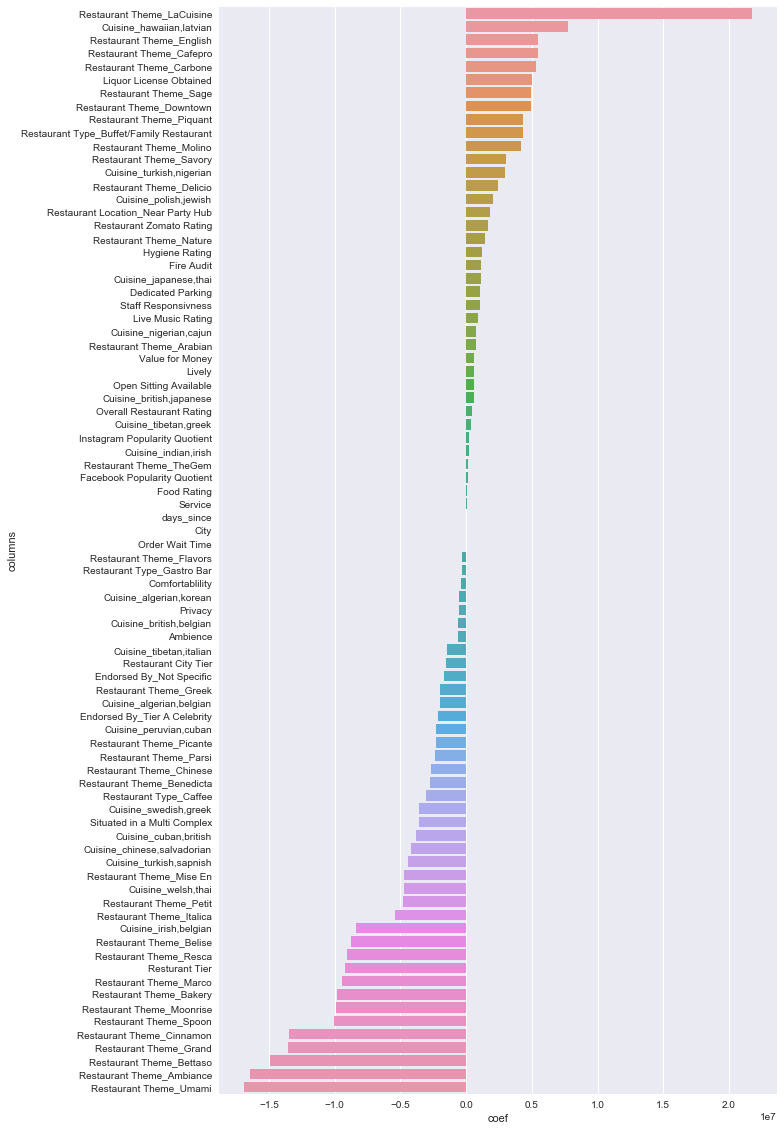

In [49]:
plt.figure(figsize = (10,20))
sns.barplot(x = "coef", y = "columns", data= sorted_coef)

In [50]:
#X_train = X_train.drop('Instagram Popularity Quotient', axis=1)
#X_train = X_train.drop('Cuisine_indian,irish', axis=1)
#X_train = X_train.drop('Restaurant Theme_TheGem', axis=1)
#X_train = X_train.drop('Facebook Popularity Quotient', axis=1)
#X_train = X_train.drop('Food Rating', axis=1)
#X_train = X_train.drop('Service', axis=1)
#X_train = X_train.drop('days_since', axis=1)
#X_train = X_train.drop('train', axis=1)
#X_train = X_train.drop('City', axis=1)
#X_train = X_train.drop('Order Wait Time', axis=1)
#X_train = X_train.drop('Restaurant Theme_Flavors', axis=1)
#X_train = X_train.drop('Restaurant Type_Gastro Bar', axis=1)

#X_test = X_test.drop('Instagram Popularity Quotient', axis=1)
#X_test = X_test.drop('Cuisine_indian,irish', axis=1)
#X_test = X_test.drop('Restaurant Theme_TheGem', axis=1)
#X_test = X_test.drop('Facebook Popularity Quotient', axis=1)
#X_test = X_test.drop('Food Rating', axis=1)
#X_test = X_test.drop('Service', axis=1)
#X_test = X_test.drop('days_since', axis=1)
#X_test = X_test.drop('train', axis=1)
#X_test = X_test.drop('City', axis=1)
#X_test = X_test.drop('Order Wait Time', axis=1)
#X_test = X_test.drop('Restaurant Theme_Flavors', axis=1)
#X_test = X_test.drop('Restaurant Type_Gastro Bar', axis=1)

In [51]:
lr_model = lr.fit(X_train,y_train)

In [52]:
lr_train_prediction = lr_model.predict(X_train)
lr_test_prediction = lr_model.predict(X_test)
#lr_test_prediction = np.expm1(lr_test_prediction)
lr_test_prediction

array([23504828.44457103, 37484618.88306357, 24894148.31699162,
       47341907.58338699, 41885544.59128925, 37952498.23564169,
       26249620.11671716, 41419942.7421177 , 26434389.28662133,
       21488898.70711705, 18878939.39113196, 34945682.03717408,
       28813352.00921595, 32200429.25956334, 16545998.17670791,
       36618030.2221386 , 40859199.23677728, 18130264.2768273 ,
       37705575.66740085, 29684956.51669395, 11473706.94860911,
       38203373.23331873, 29272468.41861023, 21346783.2297065 ,
       33704599.41424374, 22282235.18653316, 37480525.4133063 ,
       32612207.02846136, 31423590.51825477, 25163005.43463975,
       31698228.06885537, 35871472.26991162, 28950099.73175521,
       38267649.59548105, 26278890.37659392, 25413055.35171762,
       42802599.20213909, 33686476.8985236 , 23232343.82557357,
       27637158.60948571, 23877804.19940256, 22897996.61171322,
       29139473.46814566, 23228762.97852808, 37910161.47390163,
       20165414.8821968 , 23007291.43327

In [53]:
RMSE_train = np.sqrt(mean_squared_error(y_train,lr_train_prediction))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 19838506.196894854


## Lasso

In [54]:
# Lasso Regression
from sklearn import linear_model

In [55]:
lasso_params = {'alpha':[2000, 5000, 10000]}
lasso = linear_model.Lasso( max_iter = 1000)
lasso_model = GridSearchCV(lasso, param_grid = lasso_params,cv = 10)
lasso_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [2000, 5000, 10000]})

In [56]:
lasso_model.best_estimator_

Lasso(alpha=10000)

In [57]:

#lasso_model = lasso.fit(X_train, y_train)

In [58]:
lasso_train_prediction = lasso_model.predict(X_train)
lasso_test_prediction = lasso_model.predict(X_test)
#lasso_test_prediction= np.expm1(lasso_test_prediction)
lasso_test_prediction

array([23872732.98247074, 37352791.96703929, 24972778.23977315,
       47476554.01402432, 46602667.42558971, 37462814.44245814,
       26590114.87296055, 40946949.15443861, 26569208.05717334,
       20948252.52564773, 19253163.95539934, 35039268.16501914,
       29293119.81601402, 30729166.67752931, 16731086.13655935,
       36516565.50815663, 40919737.1413448 , 18193895.23963728,
       38065752.05379632, 29444792.01161531, 11173274.75932332,
       38242347.35649508, 29005866.13296287, 21286265.33264785,
       33590856.29484405, 22169718.83730224, 37170963.59897733,
       32792784.09175883, 31611117.63606692, 25312356.20620521,
       31825042.71888732, 36162479.28081447, 28880964.42166113,
       37927475.28854865, 26446028.12990974, 25445311.61645322,
       42479394.68824996, 33416562.73176294, 23491716.40500608,
       27680773.68404362, 24033617.90194304, 22373651.85905556,
       29047042.81895388, 23140673.75460863, 37646858.23806712,
       21114298.99601101, 23024430.55234

In [59]:
RMSE_train = np.sqrt(mean_squared_error(y_train,lasso_train_prediction))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 19868287.705331016


## Ridge

In [60]:
# Ridge
#ridge = linear_model.Ridge(alpha=1, max_iter = 500)
ridge_params = {'alpha':[60, 70, 80, 90, 100]}
ridge = linear_model.Ridge( max_iter = 1000)
ridge_model = GridSearchCV(ridge, param_grid = ridge_params,cv = 10)
ridge_model.fit(X_train, y_train)
#ridge_model = ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=1000),
             param_grid={'alpha': [60, 70, 80, 90, 100]})

In [61]:
ridge_model.best_estimator_

Ridge(alpha=80, max_iter=1000)

In [62]:
ridge_train_prediction = ridge_model.predict(X_train)
ridge_test_prediction = ridge_model.predict(X_test)
#ridge_test_prediction = np.expm1(ridge_test_prediction)
ridge_test_prediction

array([24101519.93302204, 37171107.74505824, 25508525.79749108,
       47332072.24462649, 45218885.72027797, 36514411.76561289,
       27563362.30025465, 40739143.77943987, 26937799.17005735,
       20387329.5737504 , 22421716.21396833, 35309373.6629194 ,
       30144271.17879624, 29009136.04779506, 17280088.97485067,
       36158840.69760078, 40837557.54393925, 18372491.34969779,
       38581836.59395199, 29189033.57302642, 10992081.91151286,
       37672308.44886646, 28886478.92945719, 21538832.65304274,
       33468173.04590328, 21917598.73954594, 36785997.53078528,
       33183194.55224214, 32670204.16692342, 25699904.96109356,
       33101945.27766814, 37465327.12035522, 29256713.37838458,
       37953974.25248446, 27263575.85449987, 25599315.70019604,
       42358249.38359435, 33550434.59738353, 24171444.41020915,
       27070862.86871263, 24406516.40388704, 22146346.71153414,
       29116833.77816037, 23526116.23556887, 37673278.29363944,
       23574477.04220094, 22756921.20391

In [63]:
RMSE_train = np.sqrt(mean_squared_error(y_train,ridge_train_prediction))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 19929421.502851464


## Elastic Net

In [64]:
eln_params = {'alpha':[ 15000 ],
             'l1_ratio': [ 0.8, 0.9, 1, 1.2, 1.5]}
eln = linear_model.ElasticNet( max_iter = 1000)
eln_model = GridSearchCV(eln, param_grid = eln_params,cv = 10)
eln_model.fit(X_train, y_train)

#eln = linear_model.ElasticNet(alpha=1.01, l1_ratio = 0.001, max_iter = 500)
#model = eln.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [15000], 'l1_ratio': [0.8, 0.9, 1, 1.2, 1.5]})

In [65]:
eln_model.best_estimator_

ElasticNet(alpha=15000, l1_ratio=1)

In [66]:
eln_train_prediction = eln_model.predict(X_train)
eln_test_prediction = eln_model.predict(X_test)
eln_test_prediction

array([23981932.58031731, 37246531.46937834, 25143870.22119739,
       47403655.83239876, 46771350.32147913, 37337749.41116466,
       26738422.68590161, 40733059.91419043, 26588150.68093545,
       20759067.2233816 , 19455641.90055357, 35038734.60950825,
       29567205.02787607, 29808427.7649486 , 16815140.85417276,
       36422131.15392533, 40906883.50553076, 18183892.92628105,
       38238839.07733886, 29309780.41528378, 11169831.74606242,
       38213857.86073405, 28933681.72147831, 21164157.75954743,
       33526584.67216753, 22217826.36165026, 36978613.92047884,
       32822116.08614624, 31739618.9828272 , 25523264.35209643,
       31943596.91403435, 36379235.42205068, 28749663.26410842,
       37881771.3112431 , 26613303.10171737, 25406882.73391221,
       42356035.13897133, 33366220.56296452, 23620435.27565973,
       27585815.79164543, 24102856.40054616, 22271294.63909614,
       28963888.59376311, 23136400.71935828, 37616980.38964932,
       21519919.09859223, 22986604.59108

In [67]:
RMSE_train = np.sqrt(mean_squared_error(y_train,eln_train_prediction))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 19878458.561926328


In [68]:
# Try scaling

In [69]:
from sklearn.preprocessing import StandardScaler # For ANN
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

## XGBoost Regressor

In [139]:
import xgboost
from xgboost import plot_importance

In [156]:
xgb = xgboost.XGBRegressor()#colsample_bytree= 0.6, #0.4, can be increased
                           #gamma=0,
                           #learning_rate=0.07,
                           #max_depth= 3,
                           #min_child_weight=1.5,
                           #n_estimators=10000,
                           #reg_alpha=0.75,
                           #reg_lambda=0.45,
                           #subsample=0.6,
                           #seed=42) 
#xgb_params = {'colsample_bytree': [ 0.05, 0.1, 0.2, 0.5, 0.8, 1],
#              'learning_rate': [0.03, 0.05, 0.07, 0.1, 0.3, 0.5 ],
#              'max_depth': [1, 2, 5, 7, 10, 15],
#              'min_child_weight': [0.2, 0.5, 0.75, 1, 1.5, 2],
#              'n_estimators': [200, 500, 700, 1000, 2500, 5000],
#              'reg_alpha': [0.05, 0.2, 0.5, 0.75, 1, 1.5],
#              'reg_lambda': [0.05, 0.2, 0.5, 0.75, 1, 1.5],
#              'subsample': [0.05, 0.2, 0.5, 0.75, 1, 1.5]
#             }
#xgb_model = GridSearchCV(xgb, param_grid = xgb_params,cv = 10)
#xgb_model.fit(X_train, y_train)

In [157]:
#xgb_model.best_params_

In [158]:
xgb_model = xgb.fit(X_train, y_train)

[15:33:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [159]:
xgb_train_prediction = xgb_model.predict(X_train)
xgb_test_prediction = xgb_model.predict(X_test)
#xgb_test_prediction

In [160]:
RMSE_train = np.sqrt(mean_squared_error(y_train,xgb_train_prediction))
print("The Root Mean Squared Error for train {}".format(RMSE_train)) #1443302.3394796958 1158730.2968138428

The Root Mean Squared Error for train 16176379.63638769


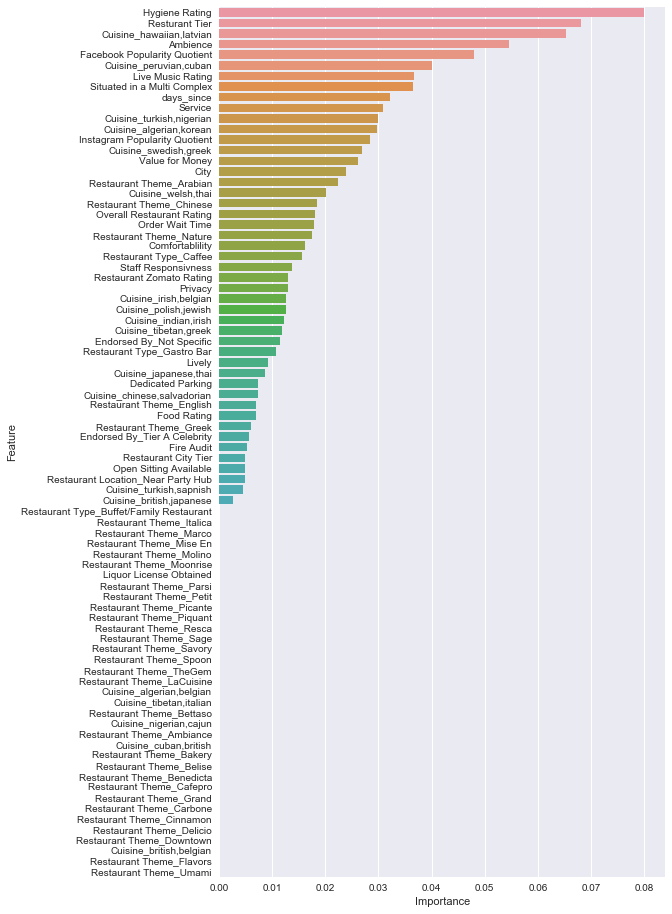

In [161]:
#Check feature importance
feature_rank = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : xgb_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,16))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [162]:
important_features = list(feature_rank.Feature[feature_rank.Importance != 0])
#important_features

In [163]:
xgb_model = xgb.fit(X_train[important_features], y_train)

[15:34:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [164]:
xgb_train_prediction = xgb_model.predict(X_train[important_features])
xgb_test_prediction = xgb_model.predict(X_test[important_features])

In [165]:
RMSE_train = np.sqrt(mean_squared_error(y_train,xgb_train_prediction))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 16176379.63638769


## Solution File

In [166]:
solution_df = pd.DataFrame(test_df['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [167]:
solution_df['Annual Turnover'] = xgb_test_prediction
solution_df

,Registration Number,Annual Turnover
0,20001,25083614.0
1,20002,37310128.0
2,20003,28281150.0
3,20004,44807256.0
4,20005,46825808.0
...,...,...
495,20496,30757350.0
496,20497,25741010.0
497,20498,33402996.0
498,20499,46127068.0


In [168]:
solution_df.to_csv('Submission.csv',index=False)